In [2]:
import pandas as pd
df = pd.read_csv('D:\\Users\\suraj_haradagatti\\Desktop\\PythonProjects\\MachineLearning\\Files\\Big Mart dataset\\train.txt')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#impute missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#missing values in item weight and outlet size
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean,inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet_size with mode
df['Outlet_Size'].fillna(mode[0], inplace = True)


In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
#deal with categorical variables and drop the id columns
df.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace =True)
df = pd.get_dummies(df)

In [15]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [16]:
#create train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis = 1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']


preprocessing - scaling the features, converting all the features into a single scale
refer to http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)


Look at the error rate for different k values

In [21]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
rmse_val = [] # to store rmse values for different k

for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    model.fit(x_train, y_train) #fit the model
    pred = model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k=', k, 'is: ', error)
    

RMSE value for k= 1 is:  1561.589565318149
RMSE value for k= 2 is:  1387.2830466588607
RMSE value for k= 3 is:  1312.5866567384132
RMSE value for k= 4 is:  1278.1284457821298
RMSE value for k= 5 is:  1257.5518306132994
RMSE value for k= 6 is:  1244.6458533298528
RMSE value for k= 7 is:  1243.6752606310986
RMSE value for k= 8 is:  1242.8324784200706
RMSE value for k= 9 is:  1237.3269827158965
RMSE value for k= 10 is:  1235.8747850159245
RMSE value for k= 11 is:  1237.9286354022825
RMSE value for k= 12 is:  1240.2527208889142
RMSE value for k= 13 is:  1245.0701273370973
RMSE value for k= 14 is:  1250.2420924420737
RMSE value for k= 15 is:  1255.3208785122317
RMSE value for k= 16 is:  1260.8997224738748
RMSE value for k= 17 is:  1267.0068854366564
RMSE value for k= 18 is:  1270.7491667824315
RMSE value for k= 19 is:  1275.862820468912
RMSE value for k= 20 is:  1278.732814981285


plotting the rmse values

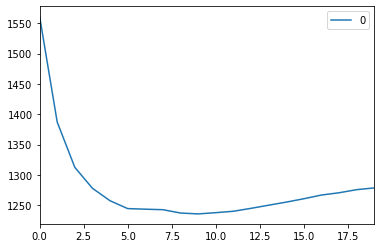

In [28]:
curve = pd.DataFrame(rmse_val) #elbow curve  # this statement converts array into df
curve.plot()

As we discussed, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 7, the RMSE is approximately 1219.06, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.

In [35]:
#predictions on the test dataset
test = pd.read_csv('D:\\Users\\suraj_haradagatti\\Desktop\\PythonProjects\\MachineLearning\\Files\\Big Mart dataset\\test.txt')

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

In [37]:
#predicting on the test set and creating submission file
predict_res = model.predict(test)

test['Item_Outlet_Sales'] = predict_res
test.to_csv('D:\\Users\\suraj_haradagatti\\Desktop\\PythonProjects\\MachineLearning\\Files\\Big Mart dataset\\submit_file.csv',index=False)

In [39]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,Item_Outlet_Sales
0,0.964275,0.023374,0.323413,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2038.57973
1,0.222983,0.118737,0.235849,0.916667,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1669.95956
2,0.598095,0.307674,0.894140,0.541667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,626.31806
3,0.164335,0.047548,0.524488,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2330.89922
4,0.494352,0.366458,0.862069,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3784.24075


For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. You can simply use gridsearch to find the best value.

In [41]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv = 5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 8}